In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [90]:
df = pd.read_csv(r'C:\Users\Hp\Machine Learning A-Z (Codes and Datasets)\Part 2 - Regression\Section 7 - Support Vector Regression (SVR)\Python\Position_Salaries.csv')

In [91]:
X = df.values[:,1:2]   #since Levels and Post of Employees has same meaning
Y = df.values[:,-1]

In [92]:
X

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9],
       [10]], dtype=object)

In [93]:
Y

array([45000, 50000, 60000, 80000, 110000, 150000, 200000, 300000, 500000,
       1000000], dtype=object)

In [94]:
Y=Y.reshape(len(Y),1)

In [95]:
Y

array([[45000],
       [50000],
       [60000],
       [80000],
       [110000],
       [150000],
       [200000],
       [300000],
       [500000],
       [1000000]], dtype=object)

# No need of train test split since the dataset is small 

# Feature Scaling

In [96]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_Y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_Y.fit_transform(Y)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [97]:
X

array([[-1.5666989 ],
       [-1.21854359],
       [-0.87038828],
       [-0.52223297],
       [-0.17407766],
       [ 0.17407766],
       [ 0.52223297],
       [ 0.87038828],
       [ 1.21854359],
       [ 1.5666989 ]])

In [98]:
Y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

# Fitting SVR to the dataset

In [99]:
from sklearn.svm import SVR
regressor = SVR(kernel ='rbf')
regressor.fit(X,Y)


C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [104]:
sc_Y.inverse_transform(regressor.predict(sc_X.fit_transform([[6.5]])))

array([131106.77303274])

# Visualizing SVR Results

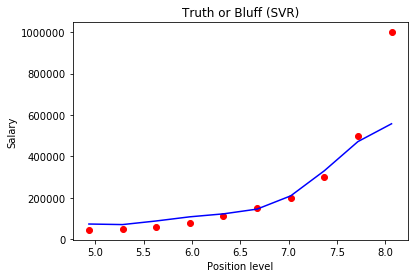

In [105]:
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_Y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

# Using Higher Dimensional and smoother curve

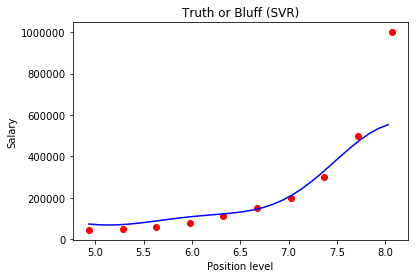

In [107]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_Y.inverse_transform(Y), color = 'red')
plt.plot(X_grid, sc_Y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()